In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap                    # 결정 경계 시각화 하기 위한 라이브러리

In [2]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
base_estimator = DecisionTreeClassifier(max_depth=1)          # Stump 생성
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

In [16]:
y_pred = ada_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc

0.91

In [17]:
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

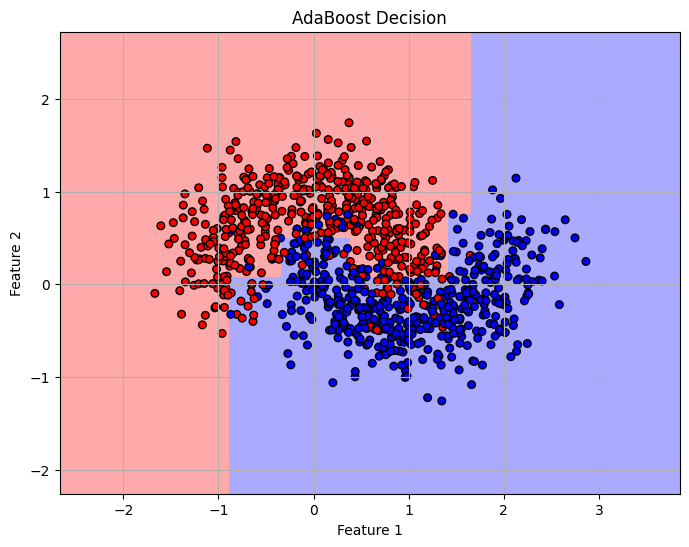

In [18]:
plot_decision_boundary(ada_clf, X, y, title="AdaBoost Decision")